In [3]:
#Dependencies:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import operator

In [4]:
# Load in file
olympic_data = "olympic_data.csv"

In [5]:
# Read and display the CSV with Pandas
olympic_data_df = pd.read_csv(olympic_data)
olympic_data_df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 4: invalid continuation byte

In [ ]:
# Create individual dataframes for each events
m_highjump_df = olympic_data_df.loc[olympic_data_df["Event"] == "High Jump Men"]
w_highjump_df = olympic_data_df.loc[olympic_data_df["Event"] == "High Jump Women"]
m_discus_df = olympic_data_df.loc[olympic_data_df["Event"] == "Discus Throw Men"]
w_discus_df = olympic_data_df.loc[olympic_data_df["Event"] == "Discus Throw Women"]
m_100_df = olympic_data_df.loc[olympic_data_df["Event"] == "100M Men"]
w_100_df = olympic_data_df.loc[olympic_data_df["Event"] == "100M Women"]
m_10000_df = olympic_data_df.loc[olympic_data_df["Event"] == "10000M Men"]
w_10000_df = olympic_data_df.loc[olympic_data_df["Event"] == "10000M Women"]
m_800_df = olympic_data_df.loc[olympic_data_df["Event"] == "800M Men"]
w_800_df = olympic_data_df.loc[olympic_data_df["Event"] == "800M Women"]


In [17]:
m_highjump_df["Result"] = m_highjump_df["Result"].map(lambda x:float(x))
m_highjump_gb = m_highjump_df.groupby(['Year',"Medal"])["Result"].mean()


<ipython-input-17-4dc70711fe9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_highjump_df["Result"] = m_highjump_df["Result"].map(lambda x:float(x))


In [30]:
# Combine male and female results for highjump
combined_highjump = [m_highjump_df, w_highjump_df]
combined_highjump_df = pd.concat(combined_highjump)
# Create new dataframe for combined_highjump_df with only gold medalists.
gold_highjump_df = combined_highjump_df.loc[combined_highjump_df["Medal"] == "G"]
gold_highjump_df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
1733,M,High Jump Men,Athens,1896,G,Ellery CLARK,USA,1.81
1736,M,High Jump Men,Paris,1900,G,Irving BAXTER,USA,1.9
1739,M,High Jump Men,St Louis,1904,G,Samuel JONES,USA,1.8
1742,M,High Jump Men,London,1908,G,Harry PORTER,USA,1.9
1746,M,High Jump Men,Stockholm,1912,G,Alma RICHARDS,USA,1.93


# Notes  
def get_change(startpoint, current point):
    if current == previous:
        return 0
    try:
        return (abs(current - previous) / previous) * 100.0
    except ZeroDivisionError:
        return float('inf')
        

<ipython-input-54-efc6e9664b01>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))


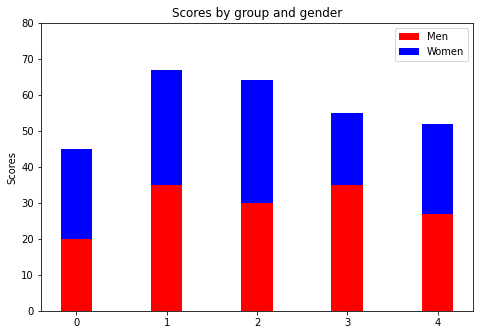

In [54]:
#attempt to visualize the change

#example_1
import numpy as np
import matplotlib.pyplot as plt
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, menMeans, width, color='r')
ax.bar(ind, womenMeans, width,bottom=menMeans, color='b')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Men', 'Women'])
plt.show()

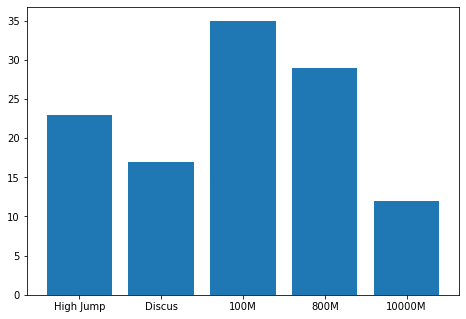

In [56]:
#example_2
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['High Jump', 'Discus', '100M', '800M', '10000M']

per_change = [23,17,35,29,12]

ax.bar(langs,per_change)
plt.show()



In [7]:
#percentage change calculation

mhj_gold_df = m_highjump_plt_df.loc[m_highjump_plt_df["Medal"]=="G",["Year", "Result"]]
# Add a column and calculate the percent change from one year to the last.
mhj_gold_df['Percent_Change'] = mhj_gold_df['Result'].pct_change(periods=1)*100
whj_gold_df['Percent_Change'] = whj_gold_df['Result'].pct_change(periods=1)*100
#Plot the High Jump gold medal male and female percent change to line graph and save file to output folder
fig= plt.figure(figsize=(15,10))
plt.plot(mhj_gold_df["Year"], mhj_gold_df["Percent_Change"], linewidth=2, marker="o", color="blue", label="Male")
plt.plot(whj_gold_df["Year"], whj_gold_df["Percent_Change"], linewidth=2, marker="o", color="red", label="Female")
plt.grid()
plt.legend(loc="upper right")
plt.title("High Jump Gold Medal Percentage Change 1896-2016")
plt.xlabel("Olympic Year")
plt.ylabel("Percent Change")
plt.savefig("Output/High Jump Gold Medal Percentage Change 1896-2016.png")
plt.show()

NameError: name 'm_highjump_plt_df' is not defined